<a href="https://colab.research.google.com/github/cher16/FDSfE_ANjoku/blob/main/In_Class_Activity/Stochastic_gradient_descent_class_work_10_18_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

stochastic gradient descent is the basic algorithm for all machine learning

hyperparameters are previously chosen before the machine learning process

In [170]:
a=23.779
b =4.9000932

In [171]:
print ("y=a*x + b")

y=a*x + b


In [172]:
print("y={0}*x + {1}".format(a,b))

y=23.779*x + 4.9000932


In [173]:
print("y={0:.3f}*x + {1:.1f}".format(a,b))

y=23.779*x + 4.9


In [174]:
import pandas as pd
import pylab as plt
import numpy as np
from mpl_toolkits import mplot3d
import statsmodels.formula.api as smf

In [175]:
wbdat =pd.read_csv("https://github.com/fedhere/FDSfE_FBianco/raw/main/data/wbank_US_leb.csv")
wbdat

,year,leb
0,1960,69.770732
1,1961,70.270732
2,1962,70.119512
3,1963,69.917073
4,1964,70.165854
5,1965,70.214634
6,1966,70.212195
7,1967,70.560976
8,1968,69.951220
9,1969,70.507317


In [176]:
wbdat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    60 non-null     int64  
 1   leb     60 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.1 KB


In [177]:
wbdat.head()

,year,leb
0,1960,69.770732
1,1961,70.270732
2,1962,70.119512
3,1963,69.917073
4,1964,70.165854


In [178]:
wbdat.tail()

,year,leb
55,2015,78.690244
56,2016,78.539024
57,2017,78.539024
58,2018,78.639024
59,2019,78.787805


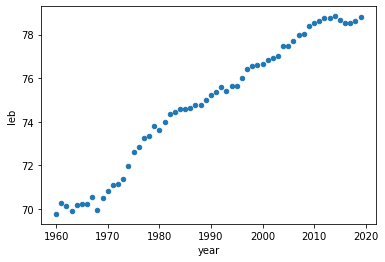

In [179]:
wbdat.plot("year", "leb", kind= "scatter")

fitting a line using gradient descent

In [180]:
def sumsqerr(Y_obs, Y_pred):
  return ((Y_obs - Y_pred)**2).sum()

In [181]:
X = wbdat["year"].values
Y = wbdat["leb"].values

In [182]:
slope = [0.1]
intercept = [-250]

In [183]:
Lrate = 1e-9

In [184]:
epochs = 20

In [185]:
Y_pred = slope[-1]*X + intercept[-1]
sse = [sumsqerr(Y, Y_pred)]

In [186]:
for i in range(epochs):
  D_m = -2 * sum(X * (Y-Y_pred))
  D_c = -2 * sum(Y-Y_pred)

In [187]:
slope.append(slope[-1]-Lrate*D_m)
intercept.append(intercept[-1] -Lrate*D_c)

In [188]:
Y_pred = slope[-1]*X + intercept[-1]

In [189]:
sse.append(sumsqerr(Y,Y_pred))

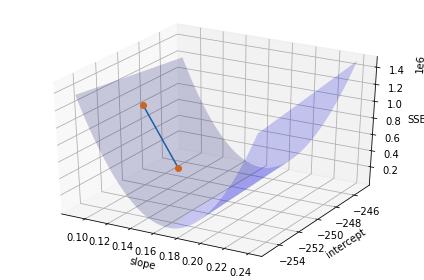

In [190]:
fig = plt.figure()
ax = plt.axes(projection= "3d")

ax.plot(slope, intercept, sse)
ax.plot(slope, intercept, sse, 'o')

ax.set_xlabel("slope")
ax.set_ylabel("intercept")
ax.set_zlabel("SSE")

def error(X, Y, THETA):
    Y_pred = THETA[1]*X + THETA[0]
    return np.sum((Y_pred - Y)**2)

ms = np.linspace(0.09, 0.24, 40)
bs = np.linspace(-255, -245, 60)

M, B = np.meshgrid(ms, bs)

zs = np.array([error(X, Y, theta)
               for theta in zip(np.ravel(B), np.ravel(M))])
Z = zs.reshape(M.shape)

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)

fig.tight_layout()
plt.show()

In [191]:
print("The final model for predicting life expectancy is: ")
print("leb = {0:.3f}*year + {1:.1f}".format(slope[-1], intercept[-1]))

The final model for predicting life expectancy is: 
leb = 0.130*year + -250.0


In [192]:
model = smf.ols(formula='leb ~ year', data=wbdat)

In [193]:
results = model.fit()

In [194]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    leb   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2139.
Date:                Tue, 18 Oct 2022   Prob (F-statistic):           1.79e-47
Time:                        21:16:23   Log-Likelihood:                -41.530
No. Observations:                  60   AIC:                             87.06
Df Residuals:                      58   BIC:                             91.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -262.4469      7.293    -35.986      0.0

In [195]:

from sklearn.metrics import r2_score
r2 = r2_score(Y, Y_pred)
print('r2 score for perfect model is', r2)

r2 score for perfect model is -492.2551070017334


I was not sure if I was to find the r squared value for the whole data or for the sum square error